# Applied Data Science
## Data transformation and integration
### Tom Diethe

In [127]:
import pandas as pd
%matplotlib inline
from StringIO import StringIO
from zipfile import ZipFile
from urllib import urlopen
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk", font_scale=2, rc={"lines.linewidth": 4})

# Life expectancy at birth, total (years)
## Data from: http://data.worldbank.org/indicator/SP.DYN.LE00.IN

In [38]:
url = urlopen('http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=csv')
archive = ZipFile(StringIO(url.read()))
print(archive.namelist())
fname = [f for f in archive.namelist() if not f.startswith('Metadata')][0]
data = StringIO(archive.read(fname))
df1 = pd.read_csv(data, skiprows=4)
df1.head()

['Metadata_Indicator_API_SP.DYN.LE00.IN_DS2_en_csv_v2.csv', 'API_SP.DYN.LE00.IN_DS2_en_csv_v2.csv', 'Metadata_Country_API_SP.DYN.LE00.IN_DS2_en_csv_v2.csv']


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,...,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,75.451098,NaN,NaN,NaN
1,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,...,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,60.374463,NaN,NaN,NaN
3,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,...,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,52.266878,NaN,NaN,NaN
4,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,...,76.652073,76.840366,77.036951,77.240585,77.443976,77.640463,77.830463,NaN,NaN,NaN


['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


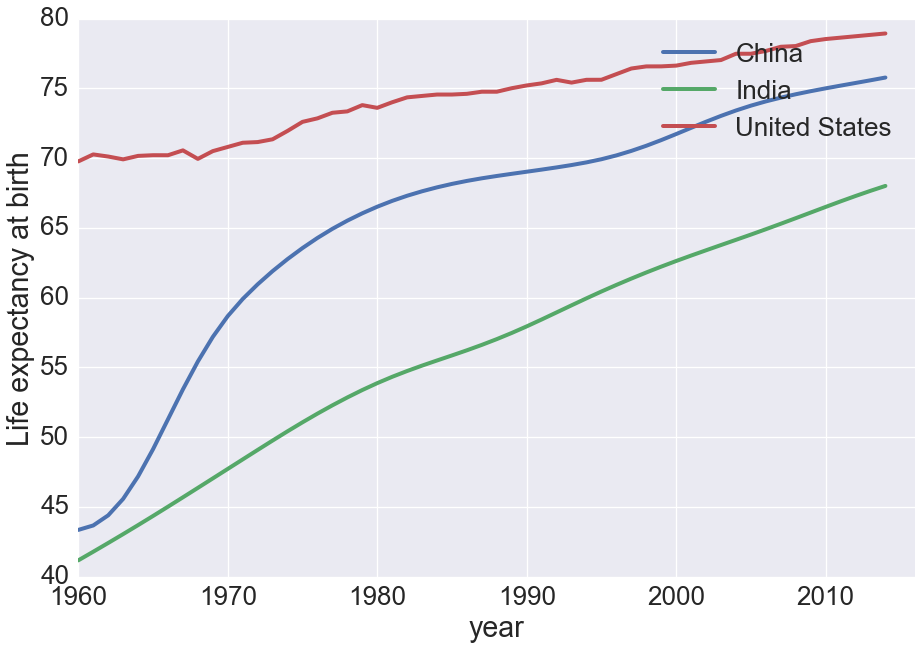

In [149]:
years = [c for c in df1.columns if c[0] == '1' or c[0] == '2']
print(years)
country = 'Country Name'
indicator = 'Life expectancy at birth'

# pd.wide_to_long(df1, years, i='Country Name', j='year')
df3 = pd.melt(df1[[country] + years], id_vars=country, var_name='year')
df3.rename(columns={'value': indicator}, inplace=True)
df3.set_index('year', inplace=True)
fig, ax = plt.subplots(figsize=[15 ,10])
for label, df in df3[(df3[country] == 'United States') | (df3[country] == 'India') | (df3[country] == 'China')].groupby(country):
    df[indicator].plot(ax=ax, label=label)
plt.legend()
ax.set_ylabel(indicator)

# Total Population
## Data from: http://data.worldbank.org/indicator/SP.POP.TOTL

In [39]:
url = urlopen('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv')
archive = ZipFile(StringIO(url.read()))
print(archive.namelist())
fname = [f for f in archive.namelist() if not f.startswith('Metadata')][0]
data = StringIO(archive.read(fname))
df2 = pd.read_csv(data, skiprows=4)
df2.head()

['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2.csv']


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,...,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0,NaN,NaN
1,Andorra,AND,"Population, total",SP.POP.TOTL,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,...,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,...,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0,NaN,NaN
3,Angola,AGO,"Population, total",SP.POP.TOTL,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,...,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0,NaN,NaN
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0,NaN,NaN


['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


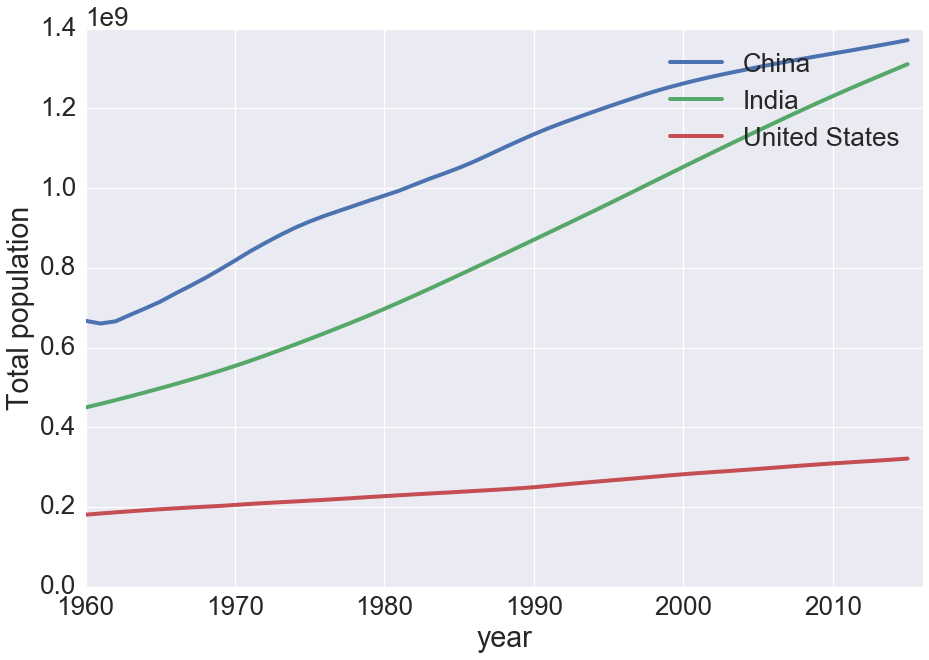

In [150]:
years = [c for c in df2.columns if c[0] == '1' or c[0] == '2']
print(years)
country = 'Country Name'
indicator = 'Total population'

# pd.wide_to_long(df1, years, i='Country Name', j='year')
df4 = pd.melt(df2[[country] + years], id_vars=country, var_name='year')
df4.rename(columns={'value': indicator}, inplace=True)
df4.set_index('year', inplace=True)
fig, ax = plt.subplots(figsize=[15 ,10])
for label, df in df4[(df4[country] == 'United States') | (df4[country] == 'India')  | (df3[country] == 'China')].groupby(country):
    df[indicator].plot(ax=ax, label=label)
plt.legend()
ax.set_ylabel(indicator)